In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions.load_data import load_data
import numpy as np


In [4]:
# Load the data
data_path = 'Data Files/V2/train_data.csv'
df = load_data(data_path)


Data loaded successfully!


In [5]:
df.replace(-1, np.nan, inplace=True)

In [6]:
# 1. Inspect the Data
# Basic information about the dataset: columns, types, and non-null counts
print("Dataset Information:")
print(df.info())

# Summary statistics for numeric and categorical data
print("\nSummary Statistics:")
print(df.describe(include='all'))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118917 entries, 0 to 118916
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               118917 non-null  object 
 1   che_pc_usd          118176 non-null  float64
 2   che_perc_gdp        115273 non-null  float64
 3   cluster_nl          118917 non-null  object 
 4   corporation         118917 non-null  object 
 5   country             118917 non-null  object 
 6   launch_date         118917 non-null  object 
 7   date                118917 non-null  object 
 8   drug_id             118917 non-null  object 
 9   ind_launch_date     118917 non-null  object 
 10  indication          118917 non-null  object 
 11  insurance_perc_che  95727 non-null   float64
 12  population          118917 non-null  float64
 13  prev_perc           118917 non-null  float64
 14  price_month         94765 non-null   float64
 15  price_unit   

In [7]:

# 2. Check for Missing Values
# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])



Missing Values:
che_pc_usd              741
che_perc_gdp           3644
insurance_perc_che    23190
price_month           24152
price_unit              239
public_perc_che         741
dtype: int64


In [8]:
# Drop rows with any null values, except for rows where only one of 'price_month' or 'price_unit' is null
df_cleaned = df[
    ~df[['price_month', 'price_unit']].isnull().all(axis=1)  # Keep rows where not both 'price_month' and 'price_unit' are null
].dropna(subset=[col for col in df.columns if col not in ['price_month', 'price_unit']])  # Drop rows with nulls in other columns

# Confirm the operation by checking for remaining null values
print("Number of remaining null values in the dataset:")
print(df_cleaned.isnull().sum().sum())  # Total number of NaNs in the cleaned DataFrame

# Display the number of rows before and after cleaning
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping nulls: {len(df_cleaned)}")

Number of remaining null values in the dataset:
21155
Original number of rows: 118917
Number of rows after dropping nulls: 92681


In [9]:
df.columns

Index(['brand', 'che_pc_usd', 'che_perc_gdp', 'cluster_nl', 'corporation',
       'country', 'launch_date', 'date', 'drug_id', 'ind_launch_date',
       'indication', 'insurance_perc_che', 'population', 'prev_perc',
       'price_month', 'price_unit', 'public_perc_che', 'therapeutic_area',
       'target'],
      dtype='object')

In [10]:

# 3. Descriptive Statistics for Numeric Columns
# List numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df[numeric_columns].describe())



Descriptive Statistics for Numeric Columns:
          che_pc_usd   che_perc_gdp  insurance_perc_che     population  \
count  118176.000000  115273.000000        95727.000000  118917.000000   
mean        1.545249       1.689515            1.495682       1.483680   
std         0.391975       0.277359            0.373842       1.336542   
min         1.000000       1.000000            1.000000       1.000000   
25%         1.183443       1.499899            1.080000       1.038227   
50%         1.472378       1.753338            1.546667       1.238870   
75%         1.816479       1.897128            1.813333       1.506685   
max         2.656913       2.311103            2.040000      12.767484   

          prev_perc   price_month     price_unit  public_perc_che  \
count  1.189170e+05  94765.000000  118678.000000    118176.000000   
mean   5.768206e-02      1.399850       1.468265         1.779325   
std    9.163269e-02      1.158043       5.468550         0.210938   
min    5.954


Visualizing Distributions...


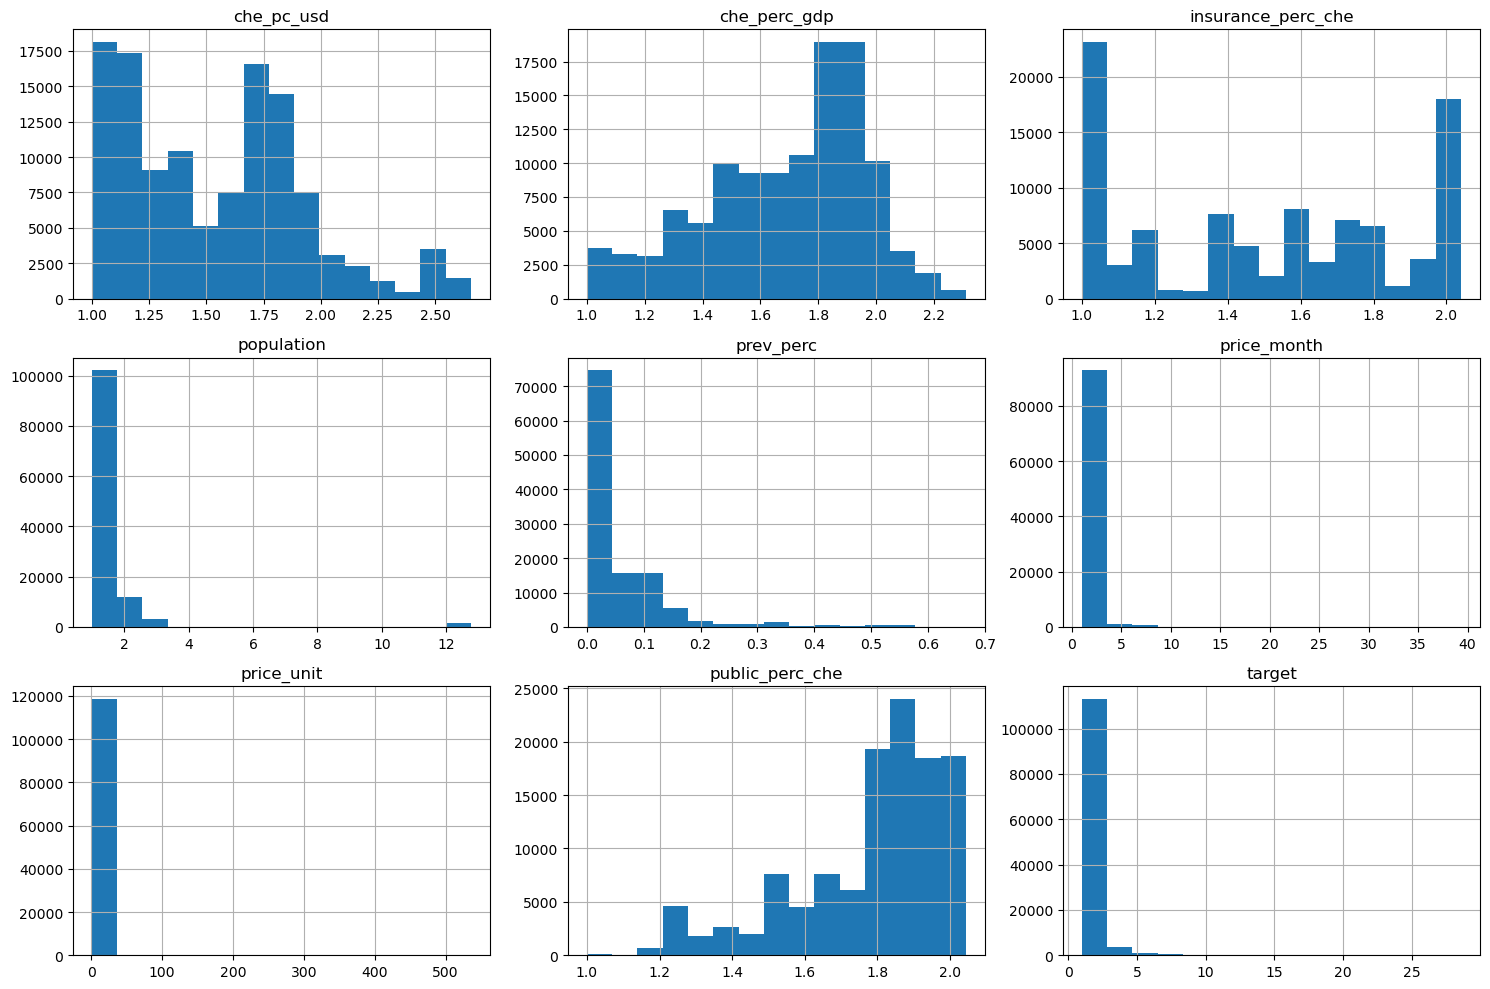

In [11]:

# 4. Visualize Distribution of Numeric Variables
# Histograms for numeric columns
print("\nVisualizing Distributions...")
df[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()



Correlation Heatmap:


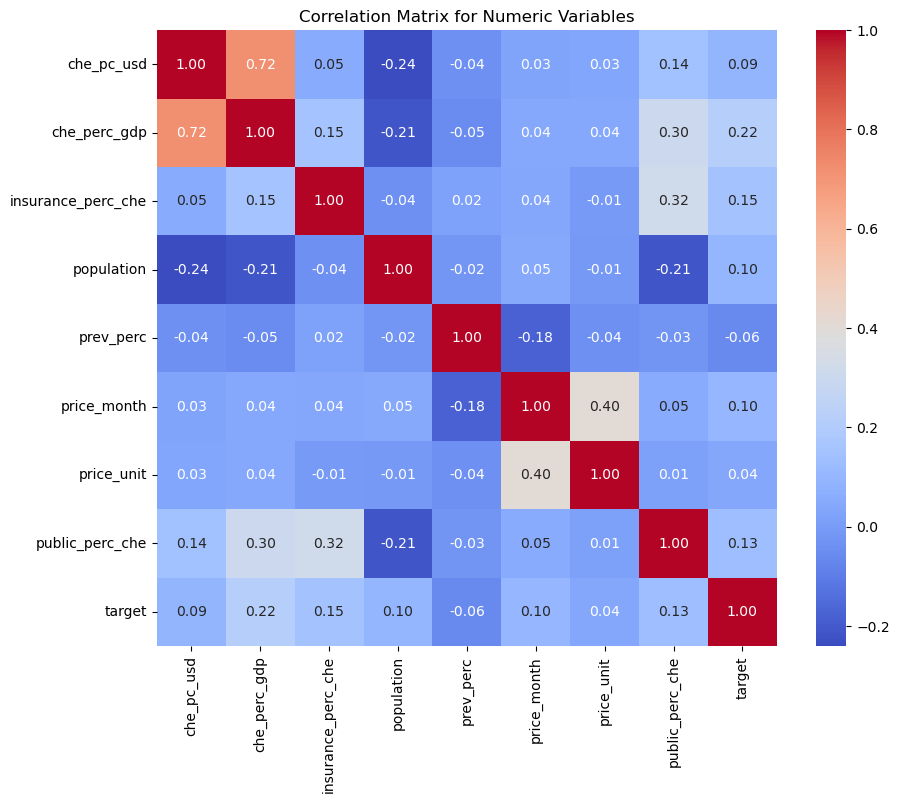

In [12]:

# 5. Correlation Analysis
# Heatmap to identify relationships between numeric variables
# print("\nCorrelation Heatmap:")
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=correlation_matrix.isnull())
plt.title("Correlation Matrix for Numeric Variables")
plt.show()



Relationship between Monthly Price and Prevalence:


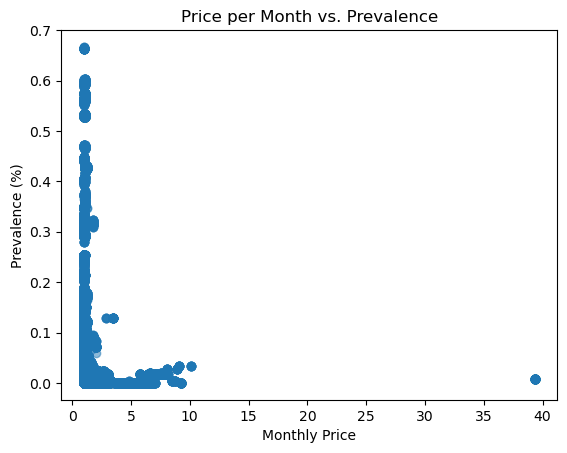


Price Distribution by Therapeutic Area:


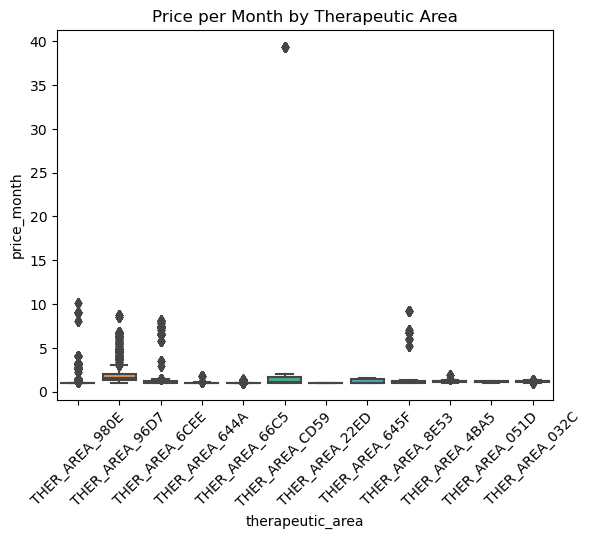

In [13]:

# 6. Relationship Analysis
# Scatter plot: Monthly price vs prevalence
print("\nRelationship between Monthly Price and Prevalence:")
plt.scatter(df['price_month'], df['prev_perc'], alpha=0.5)
plt.xlabel('Monthly Price')
plt.ylabel('Prevalence (%)')
plt.title('Price per Month vs. Prevalence')
plt.show()

# Boxplot of price by therapeutic area
print("\nPrice Distribution by Therapeutic Area:")
sns.boxplot(x='therapeutic_area', y='price_month', data=df)
plt.xticks(rotation=45)
plt.title('Price per Month by Therapeutic Area')
plt.show()

In [14]:
# 7. Top 10 Most Expensive Drugs
print("\nTop 10 Most Expensive Drugs by Monthly Price:")
top_expensive = df[['brand', 'price_month']].sort_values(by='price_month', ascending=False).head(10)
print(top_expensive)



Top 10 Most Expensive Drugs by Monthly Price:
             brand  price_month
50773   BRAND_37C0    39.343041
63997   BRAND_37C0    39.343041
76164   BRAND_37C0    39.343041
54081   BRAND_37C0    39.343041
42712   BRAND_37C0    39.343041
65041   BRAND_37C0    39.343041
100337  BRAND_37C0    39.343041
49652   BRAND_37C0    39.343041
118617  BRAND_37C0    39.343041
72009   BRAND_37C0    39.343041


In [15]:

# 8. Average Healthcare Expenditure by Country
print("\nAverage Healthcare Expenditure (per capita) by Country:")
avg_health_expenditure = df.groupby('country')['che_pc_usd'].mean().sort_values(ascending=False)
print(avg_health_expenditure)




Average Healthcare Expenditure (per capita) by Country:
country
COUNTRY_3AD0    2.536923
COUNTRY_D5B9    2.248146
COUNTRY_4242    1.962397
COUNTRY_C8F4    1.934778
COUNTRY_4442    1.892735
COUNTRY_D8B0    1.854300
COUNTRY_06E4    1.852590
COUNTRY_A67D    1.839110
COUNTRY_9891    1.827609
COUNTRY_445D    1.805900
COUNTRY_6C16    1.765583
COUNTRY_0309    1.713279
COUNTRY_89F9    1.696381
COUNTRY_6F78    1.695404
COUNTRY_53A5    1.662738
COUNTRY_C51E    1.626919
COUNTRY_5A54    1.541538
COUNTRY_1007    1.459184
COUNTRY_458E    1.432467
COUNTRY_907E    1.415929
COUNTRY_4D48    1.383363
COUNTRY_EA71    1.337848
COUNTRY_B6AE    1.290555
COUNTRY_5180    1.269184
COUNTRY_6B71    1.244168
COUNTRY_B835    1.202805
COUNTRY_2E65    1.201915
COUNTRY_88A3    1.195972
COUNTRY_3536    1.170273
COUNTRY_FA79    1.161231
COUNTRY_9488    1.149119
COUNTRY_4253    1.121581
COUNTRY_0C7D    1.104632
COUNTRY_5FEB    1.096811
COUNTRY_AE54    1.081635
COUNTRY_8DBB    1.078928
COUNTRY_C89B    1.074746
COUNTRY_EF


Public vs Private Healthcare Expenditure by Country:


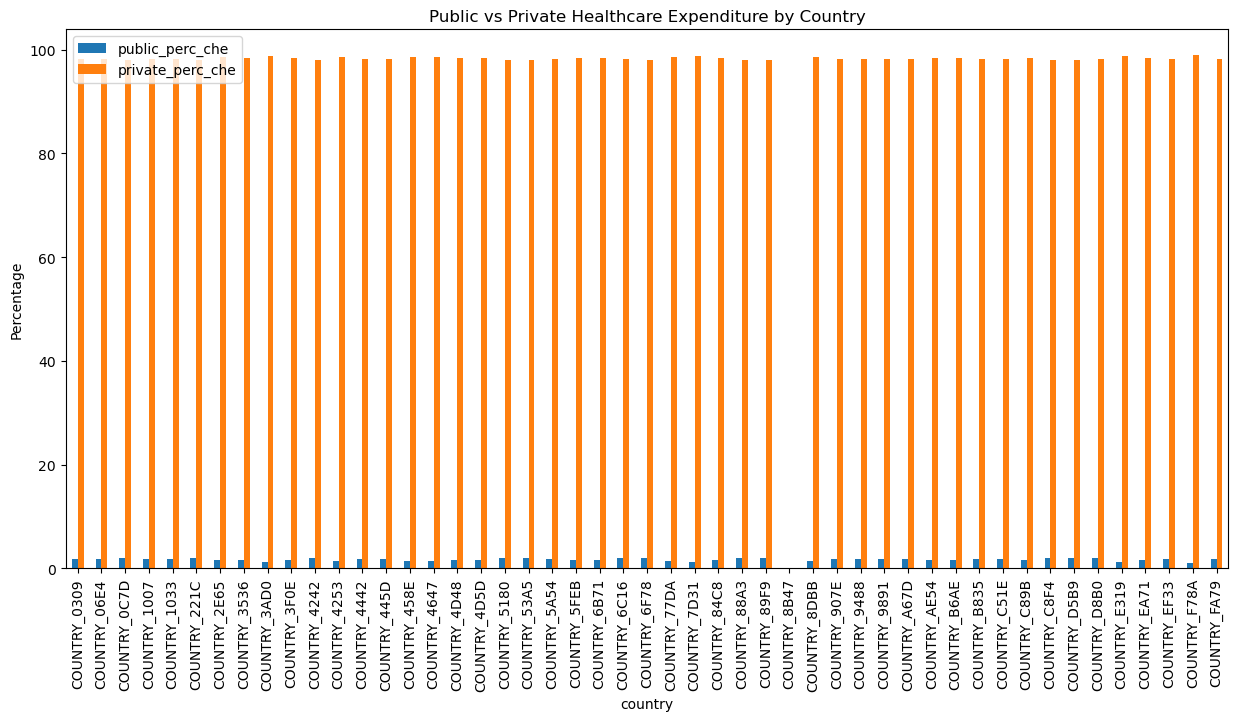

In [16]:

# 9. Public vs Private Healthcare Expenditure
print("\nPublic vs Private Healthcare Expenditure by Country:")
df['private_perc_che'] = 100 - df['public_perc_che']  # Calculate private expenditure percentage
public_private = df[['country', 'public_perc_che', 'private_perc_che']].groupby('country').mean()
public_private.plot(kind='bar', figsize=(15, 7))
plt.title('Public vs Private Healthcare Expenditure by Country')
plt.ylabel('Percentage')
plt.show()



Analyzing Target (Monthly Sales):


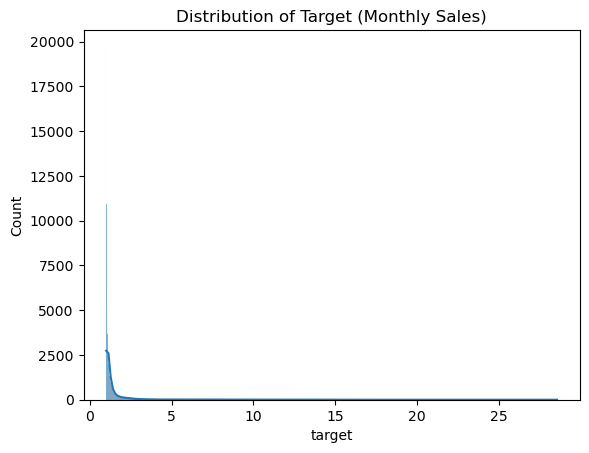

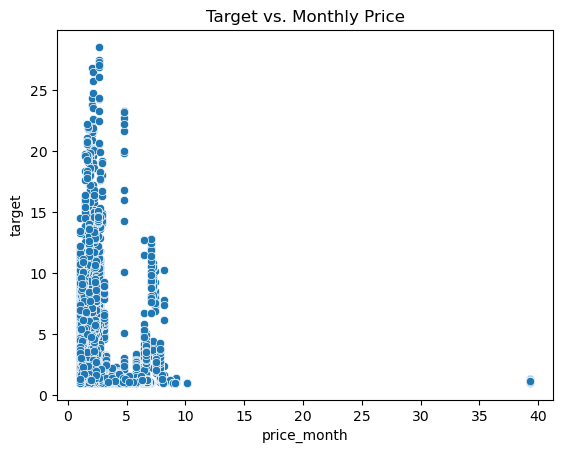

In [17]:

# 10. Target Variable Analysis
print("\nAnalyzing Target (Monthly Sales):")
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target (Monthly Sales)')
plt.show()

sns.scatterplot(x='price_month', y='target', data=df)
plt.title('Target vs. Monthly Price')
plt.show()




Drug Launch Year Analysis:


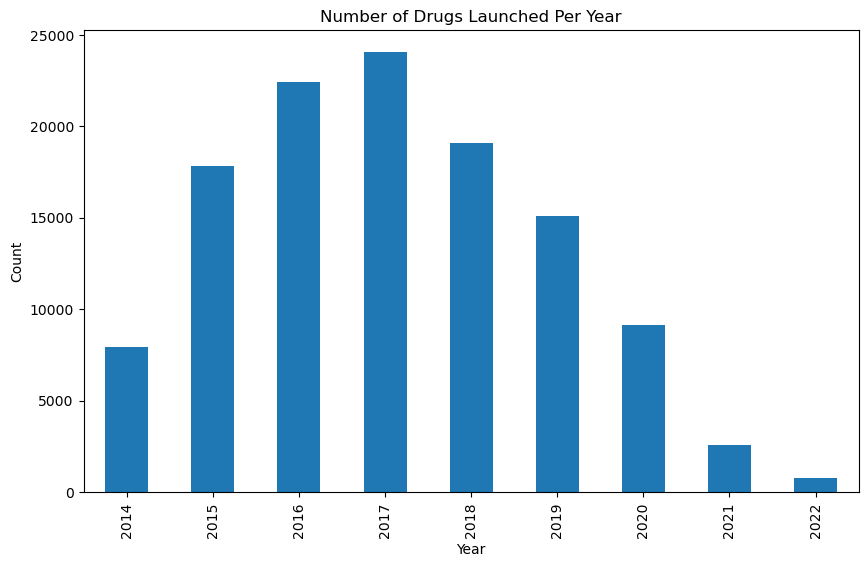

In [18]:
# 11. Drug Launch Year Analysis
# Convert 'launch_date' to datetime and extract year
print("\nDrug Launch Year Analysis:")
df['launch_year'] = pd.to_datetime(df['launch_date']).dt.year

launch_counts = df['launch_year'].value_counts().sort_index()
launch_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Drugs Launched Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



In [19]:
# 12. Therapeutic Area Insights
print("\nAverage Monthly Price by Therapeutic Area:")
avg_price_therapeutic_area = df.groupby('therapeutic_area')['price_month'].mean().sort_values(ascending=False)
print(avg_price_therapeutic_area)




Average Monthly Price by Therapeutic Area:
therapeutic_area
THER_AREA_CD59    2.465775
THER_AREA_8E53    1.927438
THER_AREA_96D7    1.758722
THER_AREA_6CEE    1.330706
THER_AREA_4BA5    1.216119
THER_AREA_645F    1.204595
THER_AREA_032C    1.166296
THER_AREA_980E    1.129427
THER_AREA_051D    1.119032
THER_AREA_644A    1.028735
THER_AREA_66C5    1.026825
THER_AREA_22ED    1.006802
Name: price_month, dtype: float64



Relationship between Healthcare Expenditure and Target:


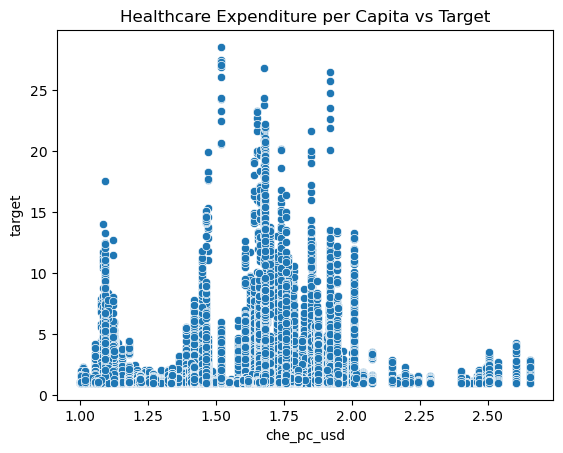

In [20]:
# 13. Healthcare Expenditure vs Target
print("\nRelationship between Healthcare Expenditure and Target:")
sns.scatterplot(x='che_pc_usd', y='target', data=df)
plt.title('Healthcare Expenditure per Capita vs Target')
plt.show()



In [21]:
# 14. Prevalence and Population Insights
print("\nWeighted Prevalence by Country:")
df['weighted_prevalence'] = df['prev_perc'] * df['population']  # Calculate weighted prevalence
weighted_prevalence = df.groupby('country')['weighted_prevalence'].sum().sort_values(ascending=False)
print(weighted_prevalence)


Weighted Prevalence by Country:
country
COUNTRY_AE54    831.464494
COUNTRY_53A5    647.739210
COUNTRY_8DBB    445.854524
COUNTRY_D8B0    416.625620
COUNTRY_907E    409.582680
COUNTRY_4253    361.520373
COUNTRY_445D    343.713841
COUNTRY_89F9    339.860568
COUNTRY_B6AE    319.345392
COUNTRY_1007    312.539954
COUNTRY_3AD0    300.977069
COUNTRY_4D48    295.315261
COUNTRY_0309    277.782106
COUNTRY_221C    274.796523
COUNTRY_B835    269.272731
COUNTRY_4242    254.899013
COUNTRY_D5B9    251.505123
COUNTRY_E319    227.150935
COUNTRY_5FEB    225.672213
COUNTRY_5180    222.197218
COUNTRY_6B71    219.418473
COUNTRY_4442    217.026715
COUNTRY_6C16    205.949261
COUNTRY_9488    191.356503
COUNTRY_9891    169.222124
COUNTRY_6F78    163.217071
COUNTRY_84C8    161.052389
COUNTRY_06E4    160.425912
COUNTRY_3536    153.483475
COUNTRY_FA79    152.993829
COUNTRY_EA71    152.621268
COUNTRY_2E65    144.720610
COUNTRY_88A3    144.185806
COUNTRY_EF33    115.261138
COUNTRY_0C7D    106.641353
COUNTRY_C89B  

In [22]:
# 1. Identify Non-Numeric Columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("\nNon-Numeric Columns:")
print(non_numeric_columns)




Non-Numeric Columns:
Index(['brand', 'cluster_nl', 'corporation', 'country', 'launch_date', 'date',
       'drug_id', 'ind_launch_date', 'indication', 'therapeutic_area',
       'launch_year'],
      dtype='object')


In [23]:
# 2. Unique Value Counts for Non-Numeric Columns
print("\nUnique Value Counts for Non-Numeric Columns:")
for col in non_numeric_columns:
    print(f"{col}: {df[col].nunique()} unique values")




Unique Value Counts for Non-Numeric Columns:
brand: 591 unique values
cluster_nl: 2716 unique values
corporation: 136 unique values
country: 49 unique values
launch_date: 103 unique values
date: 103 unique values
drug_id: 257 unique values
ind_launch_date: 123 unique values
indication: 257 unique values
therapeutic_area: 12 unique values
launch_year: 9 unique values


In [24]:
# 3. Frequency Distribution of Non-Numeric Columns
print("\nFrequency Distribution for Non-Numeric Columns:")
for col in non_numeric_columns:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())





Frequency Distribution for Non-Numeric Columns:

brand Value Counts:
brand
BRAND_0056    2366
BRAND_62C7    1875
BRAND_7A2E    1762
BRAND_A12A    1761
BRAND_4048    1642
              ... 
BRAND_68E1       1
BRAND_0417       1
BRAND_47A8       1
BRAND_E02F       1
BRAND_ECB8       1
Name: count, Length: 591, dtype: int64

cluster_nl Value Counts:
cluster_nl
BRAND_354E_COUNTRY_88A3    60
BRAND_A12A_COUNTRY_D5B9    60
BRAND_DBFB_COUNTRY_907E    60
BRAND_0056_COUNTRY_3AD0    60
BRAND_FCB2_COUNTRY_6B71    60
                           ..
BRAND_2CB8_COUNTRY_D5B9     1
BRAND_7202_COUNTRY_B6AE     1
BRAND_F2F2_COUNTRY_B6AE     1
BRAND_2205_COUNTRY_5FEB     1
BRAND_3938_COUNTRY_907E     1
Name: count, Length: 2716, dtype: int64

corporation Value Counts:
corporation
CORP_01C7    19445
CORP_5CBD     9004
CORP_C868     7771
CORP_8F4F     6502
CORP_A713     5879
             ...  
CORP_7527       12
CORP_3573        2
CORP_F9A9        1
CORP_2F56        1
CORP_FE01        1
Name: count, Length: 


Boxplot: Monthly Price by Therapeutic Area


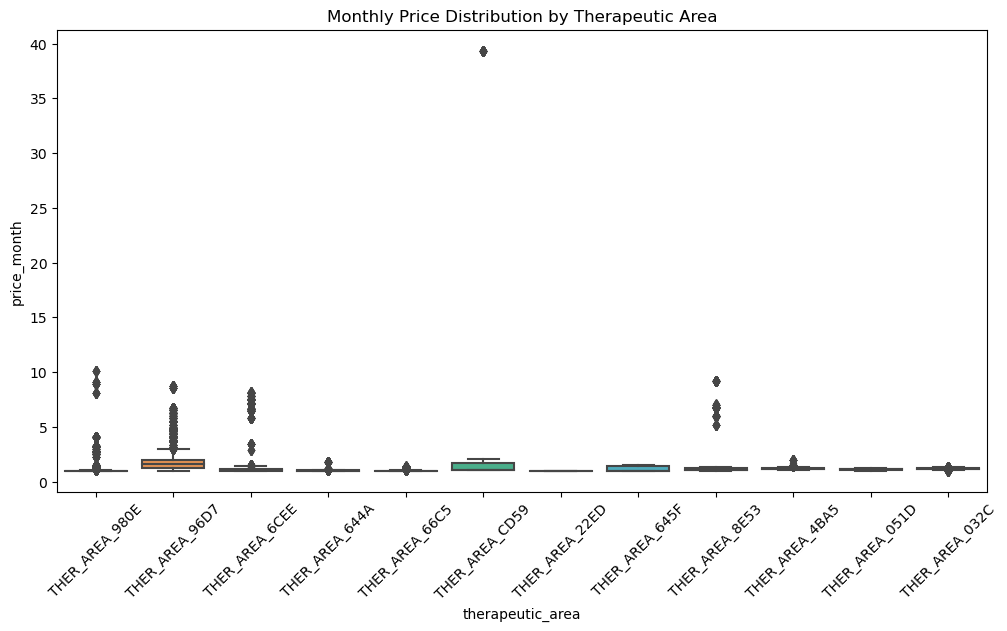


Bar Plot: Number of Drug Launches by Corporation


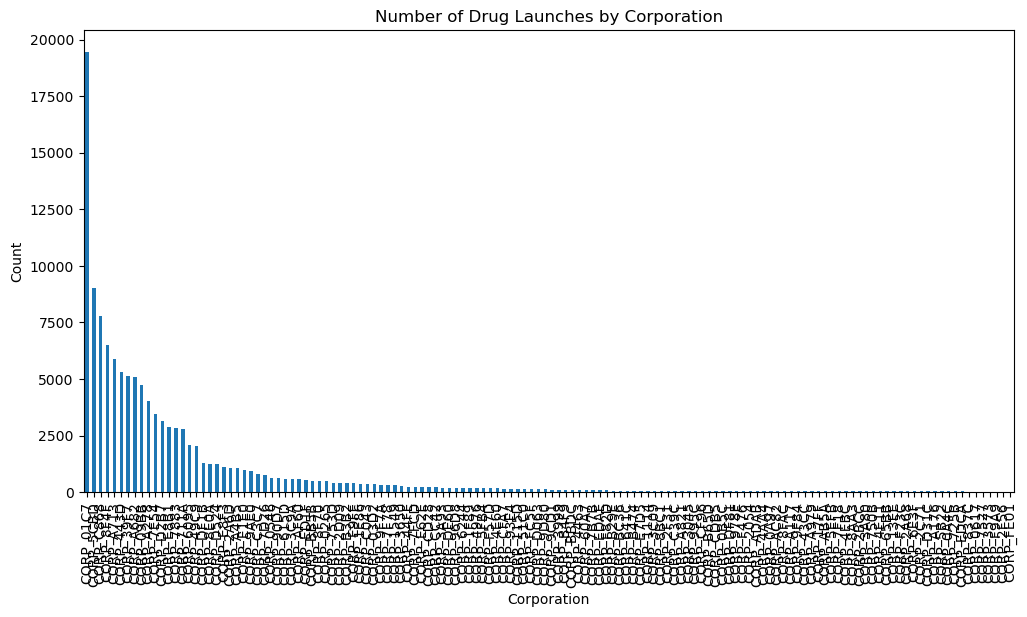

In [25]:
# 4. Explore Relationships with Categorical Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot of 'price_month' by 'therapeutic_area'
if 'therapeutic_area' in df.columns and 'price_month' in df.columns:
    print("\nBoxplot: Monthly Price by Therapeutic Area")
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='therapeutic_area', y='price_month', data=df)
    plt.xticks(rotation=45)
    plt.title("Monthly Price Distribution by Therapeutic Area")
    plt.show()

# Example: Bar plot of drug launches per corporation
if 'corporation' in df.columns:
    print("\nBar Plot: Number of Drug Launches by Corporation")
    corporation_counts = df['corporation'].value_counts()
    corporation_counts.plot(kind='bar', figsize=(12, 6))
    plt.title("Number of Drug Launches by Corporation")
    plt.xlabel("Corporation")
    plt.ylabel("Count")
    plt.show()



C:\Users\imata\AppData\Local\Temp\ipykernel_38760\2288480979.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = df.select_dtypes(include=['object']).apply(lambda col: pd.to_datetime(col, errors='coerce')).dropna(axis=1).columns
C:\Users\imata\AppData\Local\Temp\ipykernel_38760\2288480979.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = df.select_dtypes(include=['object']).apply(lambda col: pd.to_datetime(col, errors='coerce')).dropna(axis=1).columns
C:\Users\imata\AppData\Local\Temp\ipykernel_38760\2288480979.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please


Date Columns:
Index(['launch_date', 'date'], dtype='object')

Drug Launches Over Time:


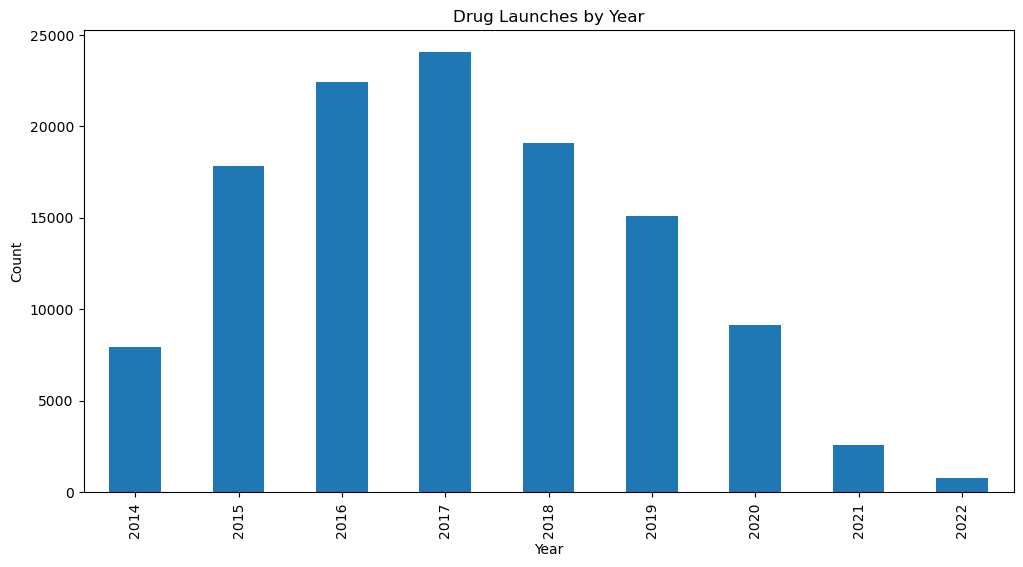

In [26]:
# 5. Analyze Date Columns
# Convert date columns to datetime if not already
date_columns = df.select_dtypes(include=['object']).apply(lambda col: pd.to_datetime(col, errors='coerce')).dropna(axis=1).columns
print("\nDate Columns:")
print(date_columns)

# Example: Drug launches over time
if 'launch_date' in df.columns:
    print("\nDrug Launches Over Time:")
    df['launch_date'] = pd.to_datetime(df['launch_date'], errors='coerce')
    df['launch_year'] = df['launch_date'].dt.year
    launches_by_year = df['launch_year'].value_counts().sort_index()
    launches_by_year.plot(kind='bar', figsize=(12, 6))
    plt.title("Drug Launches by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()




Average Target (Sales) by Therapeutic Area:
therapeutic_area
THER_AREA_CD59    1.802833
THER_AREA_96D7    1.596481
THER_AREA_6CEE    1.380306
THER_AREA_051D    1.332736
THER_AREA_032C    1.324386
THER_AREA_66C5    1.291197
THER_AREA_644A    1.251695
THER_AREA_980E    1.221282
THER_AREA_4BA5    1.213526
THER_AREA_8E53    1.180512
THER_AREA_645F    1.087097
THER_AREA_22ED    1.016933
Name: target, dtype: float64


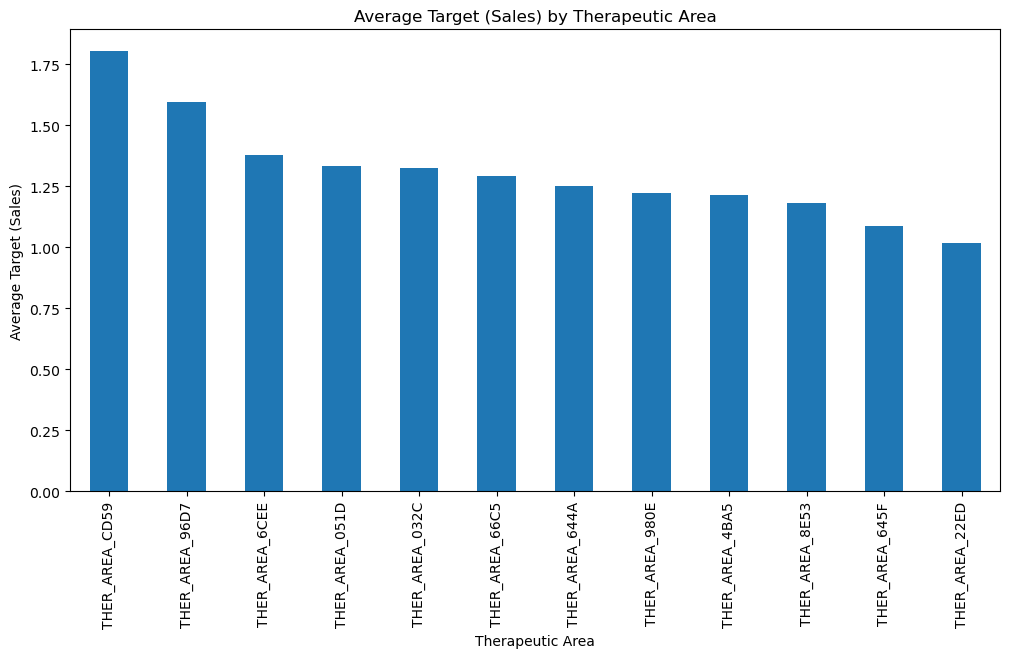

In [27]:
# 6. Analyze Target Relationships with Non-Numeric Variables
# Example: Average target by therapeutic area
if 'therapeutic_area' in df.columns and 'target' in df.columns:
    print("\nAverage Target (Sales) by Therapeutic Area:")
    avg_target_by_area = df.groupby('therapeutic_area')['target'].mean().sort_values(ascending=False)
    print(avg_target_by_area)
    avg_target_by_area.plot(kind='bar', figsize=(12, 6))
    plt.title("Average Target (Sales) by Therapeutic Area")
    plt.xlabel("Therapeutic Area")
    plt.ylabel("Average Target (Sales)")
    plt.show()